<a href="https://colab.research.google.com/github/melativj/H8_PTP_FINAL_IMAGE/blob/master/CatDog_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cat & Dog Classification

## Import packages needed

In [0]:
from matplotlib.image import imread
from PIL import Image
import IPython.display as display

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

import tensorflow as tf
import matplotlib.pyplot as plt
import math
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Download and load Data

In [0]:
##Download dataset from the URL link given
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
# Read the directory dataset
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')   # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')   # directory with our validation dog pictures

In [46]:
## Calculate how many cats and dogs images are in the training & validation directory
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("---")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
---
Total training images: 2000
Total validation images: 1000


## Pre-Process Data

In [0]:
# Define Classes Name
class_names=['Cat','Dog']

In [0]:
# Initialization
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [49]:
# Preprocess Data
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data with rescale 
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data with rescale 

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

for image, label in train_data_gen:
  break
  
for image_test, label_test in val_data_gen:
  break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Visualize Sample Data

<function matplotlib.pyplot.show>

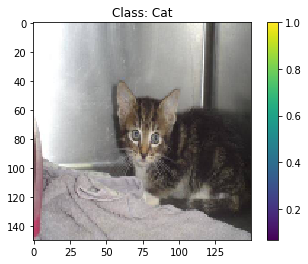

In [50]:
# Plot Sample Image from Data Train
image = image[1]    
lbl = label[1]

plt.figure()
plt.imshow(image)
plt.title("Class: {}".format(class_names[int(lbl)]))
plt.colorbar()
plt.grid(False)
plt.show

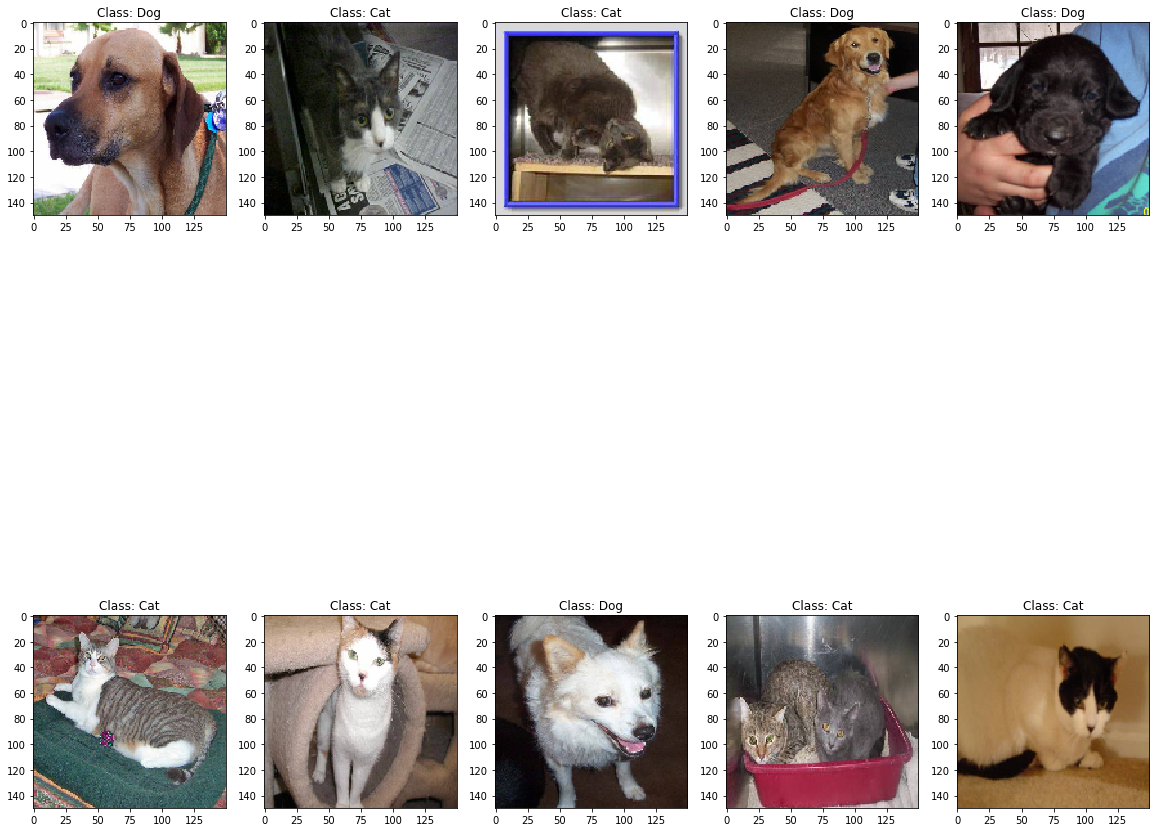

In [54]:
# Define function for plot images in the form of a grid with 2 row & 5 columns where images and label are placed in each column.
def plotImages(images_arr, label_arr, is_predicted=0, mdl=0):
    fig, axes = plt.subplots(2, 5, figsize=(20,20))
    axes = axes.flatten()
    if is_predicted==0 and mdl==0 :
      for img, lbl, ax in zip( images_arr, label_arr, axes):
          ax.imshow(img)
          ax.axis()
          no_lbl = int(lbl)
          ax.set_title("Class: {}".format(class_names[no_lbl]))
    else:
      result_2 = mdl.predict(x = images_arr)
      lbl_2 = mdl.predict_classes(x = images_arr)
      for index, (hsl, img, lbl, ax) in enumerate(zip( lbl_2, images_arr, label_arr, axes)):
        ax.imshow(img)
        ax.axis()
        ax.set_title("Class: {}  --> Predict: {}".format(class_names[int(lbl)], class_names[int(hsl)]))
    plt.show()

sample_training_images, sample_training_label = next(train_data_gen) #returns a batch from the train dataset
plotImages(sample_training_images[:10], sample_training_label[:10]) #Plot 10 Data image & label using function plotImages

## Create the Model

In [0]:
# The model customized using three convolution blocks with a max pool layer in each of them and connectedfully connected layer with 512 units on top of it that is activated by a 'relu' activation function.
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [60]:
# compile model using adam optimizer and binary cross entropy loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Summary from The model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 20736)            

## Fit the Model

In [61]:
# Fit the model
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/20
15/15 [==============================] - 8s 545ms/step - loss: 0.8315 - acc: 0.5027 - val_loss: 0.6925 - val_acc: 0.5045
Epoch 2/20
15/15 [==============================] - 8s 530ms/step - loss: 0.6907 - acc: 0.5160 - val_loss: 0.6887 - val_acc: 0.5045
Epoch 3/20
15/15 [==============================] - 8s 514ms/step - loss: 0.6802 - acc: 0.4995 - val_loss: 0.6760 - val_acc: 0.5558
Epoch 4/20
15/15 [==============================] - 8s 509ms/step - loss: 0.6516 - acc: 0.5732 - val_loss: 0.6553 - val_acc: 0.6406
Epoch 5/20
15/15 [==============================] - 7s 500ms/step - loss: 0.6337 - acc: 0.5943 - val_loss: 0.6514 - val_acc: 0.6496
Epoch 6/20
15/15 [==============================] - 8s 512ms/step - loss: 0.5607 - acc: 0.6935 - val_loss: 0.5752 - val_acc: 0.6931
Epoch 7/20
15/15 [==============================] - 7s 494ms/step - loss: 0.5067 - acc: 0.7356 - val_loss: 0.5480 - val_acc: 0.7098
Epoch 8/20
15/15 [==============================] - 7s 480ms/step - loss: 0.

#Visualize Training Data & results

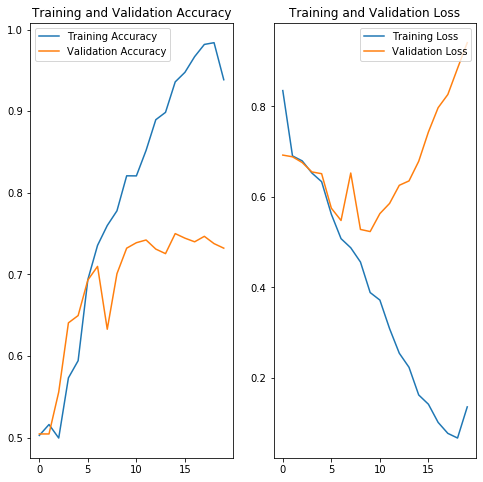

8/8 [==============================] - 3s 340ms/step - loss: 0.9812 - acc: 0.7290


[0.9812134727835655, 0.729]

In [63]:
# Define Function acc_loss_Plot for Plot Training and Validation Accuracy & Loss
def acc_loss_Plot(hist):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='upper left')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

# Plot Training and Validation Accuracy & Loss
acc_loss_Plot(history)

# Evaluate the Model
model.evaluate(val_data_gen)

 The model achieved an accuracy of about 72% on the test dataset and overfit at epochs 6

# Prediction

<function matplotlib.pyplot.show>

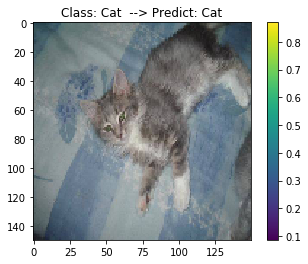

In [64]:
# Predict the Image using the model we create
result = model.predict(x = image_test)
lbl_pred_2 = model.predict_classes(x = image_test)

# Randomly take one sample in batch that predicted and visualize using plot
import random
rnd = random.randrange(128)
test_1 = image_test[rnd]
lbl_1 = label_test[rnd]
lbl_pred_2 = lbl_pred_2[rnd]

plt.figure()
plt.imshow(test_1)
plt.title("Class: {}  --> Predict: {}".format(class_names[int(lbl_1)], class_names[int(lbl_pred_2)]))
plt.colorbar()
plt.grid(False)
plt.show

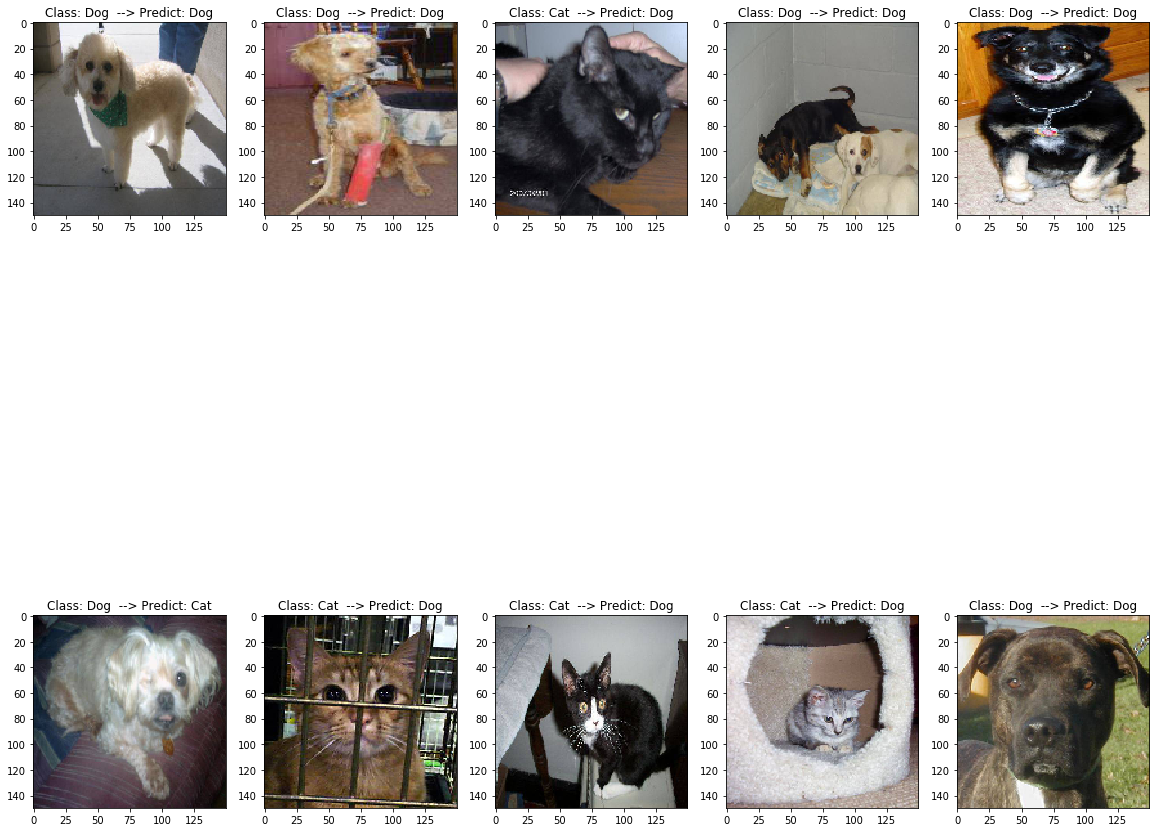

In [68]:
# Visualize image validation using plotImages function that we defined and predict
plotImages(image_test[:10], label_test[:10], 1, model)

# Resolve Overfit Data:
1. DropOut
2. Data augmentation & DropOut

## 1. Only Dropout

In [0]:
# Create New Model using Dropout of 20% inputs
model_dropout = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [71]:
# Compile and Summary the new model
model_dropout.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_dropout.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 18, 18, 64)       

In [72]:
# Fit the New Model
history_dropout = model_dropout.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/20
15/15 [==============================] - 8s 557ms/step - loss: 0.8531 - acc: 0.4948 - val_loss: 0.6938 - val_acc: 0.5045
Epoch 2/20
15/15 [==============================] - 8s 540ms/step - loss: 0.6926 - acc: 0.4995 - val_loss: 0.6910 - val_acc: 0.5045
Epoch 3/20
15/15 [==============================] - 8s 541ms/step - loss: 0.6771 - acc: 0.5083 - val_loss: 0.6728 - val_acc: 0.5156
Epoch 4/20
15/15 [==============================] - 8s 522ms/step - loss: 0.6588 - acc: 0.5806 - val_loss: 0.6714 - val_acc: 0.5558
Epoch 5/20
15/15 [==============================] - 8s 516ms/step - loss: 0.6347 - acc: 0.6207 - val_loss: 0.6425 - val_acc: 0.5871
Epoch 6/20
15/15 [==============================] - 8s 507ms/step - loss: 0.5927 - acc: 0.6677 - val_loss: 0.6456 - val_acc: 0.5647
Epoch 7/20
15/15 [==============================] - 8s 501ms/step - loss: 0.5679 - acc: 0.6960 - val_loss: 0.6057 - val_acc: 0.6317
Epoch 8/20
15/15 [==============================] - 7s 492ms/step - loss: 0.

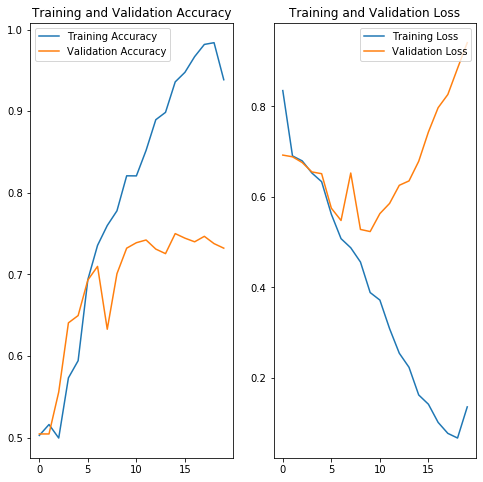

8/8 [==============================] - 3s 344ms/step - loss: 0.7401 - acc: 0.7320


[0.7401001825928688, 0.732]

In [73]:
# Using function 'acc_loss_Plot' to visualize Training and Validation Accuracy & Loss
acc_loss_Plot(history_dropout)

#Evaluate the model using Dropout
model_dropout.evaluate(val_data_gen)

The new model achieved an accuracy of about 73% on the test dataset and overfit at epochs 6

## 2. Data Augmentation & Dropout

In [84]:
# Recreated Image using rotation, horizontal flip , zoom, width_shift_range, and height_shift_range.
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.2
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
for image, label in train_data_gen:
  break

Found 2000 images belonging to 2 classes.


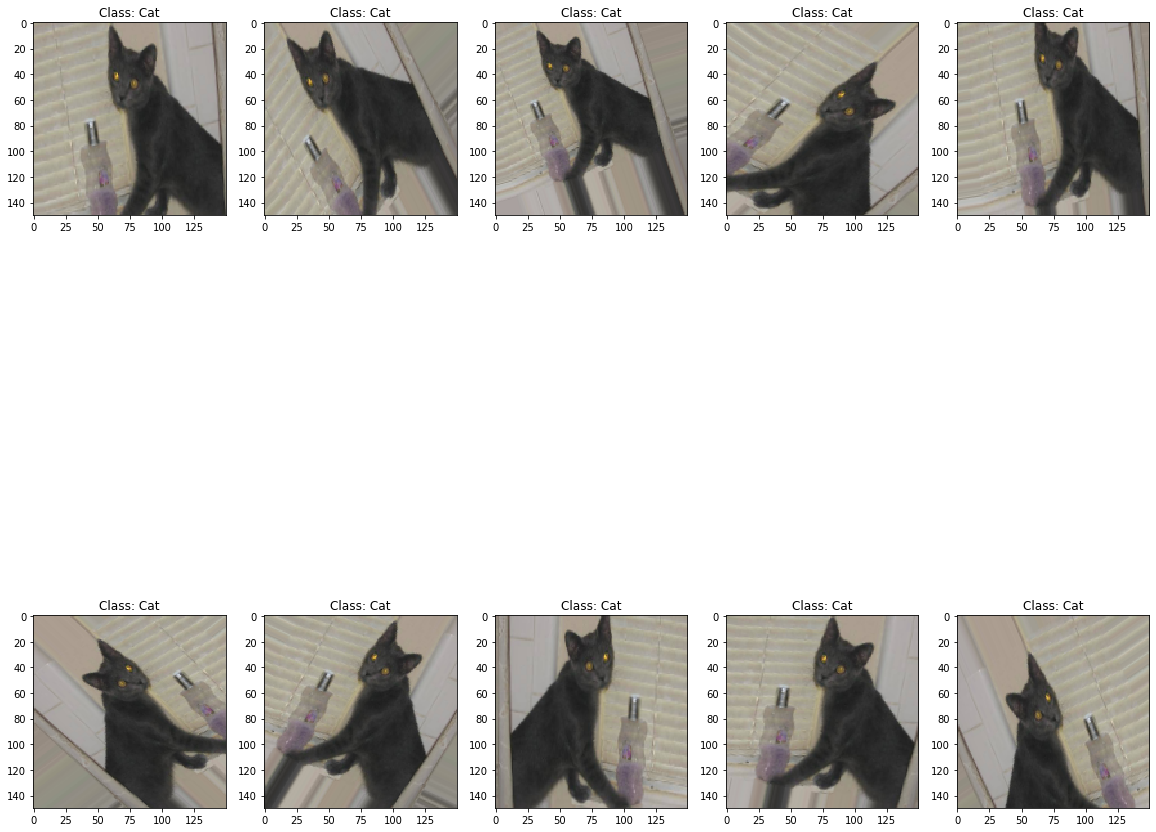

In [85]:
# Visualization the training examples
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
augmented_label = [label[0] for i in range(10)]
plotImages(augmented_images, augmented_label)

In [86]:
# Fit the new model using dropout and augmented data
history_1 = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/20
15/15 [==============================] - 17s 1s/step - loss: 0.4642 - acc: 0.7575 - val_loss: 0.4697 - val_acc: 0.7623
Epoch 2/20
15/15 [==============================] - 16s 1s/step - loss: 0.4639 - acc: 0.7644 - val_loss: 0.4761 - val_acc: 0.7377
Epoch 3/20
15/15 [==============================] - 16s 1s/step - loss: 0.4483 - acc: 0.7858 - val_loss: 0.4723 - val_acc: 0.7768
Epoch 4/20
15/15 [==============================] - 15s 1s/step - loss: 0.4683 - acc: 0.7660 - val_loss: 0.4829 - val_acc: 0.7768
Epoch 5/20
15/15 [==============================] - 16s 1s/step - loss: 0.4576 - acc: 0.7698 - val_loss: 0.4903 - val_acc: 0.7768
Epoch 6/20
15/15 [==============================] - 15s 1s/step - loss: 0.4432 - acc: 0.7794 - val_loss: 0.4684 - val_acc: 0.7478
Epoch 7/20
15/15 [==============================] - 16s 1s/step - loss: 0.4441 - acc: 0.7766 - val_loss: 0.4549 - val_acc: 0.7824
Epoch 8/20
15/15 [==============================] - 15s 1s/step - loss: 0.4439 - acc: 0.78

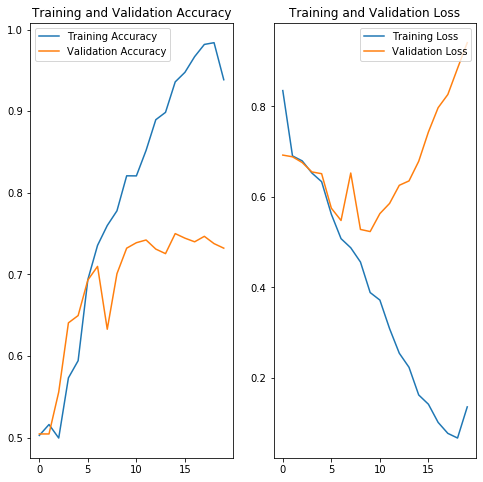

8/8 [==============================] - 3s 385ms/step - loss: 0.7401 - acc: 0.7320


[0.7401001825928688, 0.732]

In [87]:
# Using function 'acc_loss_Plot' to visualize Training and Validation Accuracy & Loss
acc_loss_Plot(history_1)

# Evaluate the model
model_dropout.evaluate(val_data_gen)

The new model using Data Augmentation and Dropout achieved an accuracy of about 73% on the test dataset and overfit at epochs 6-7

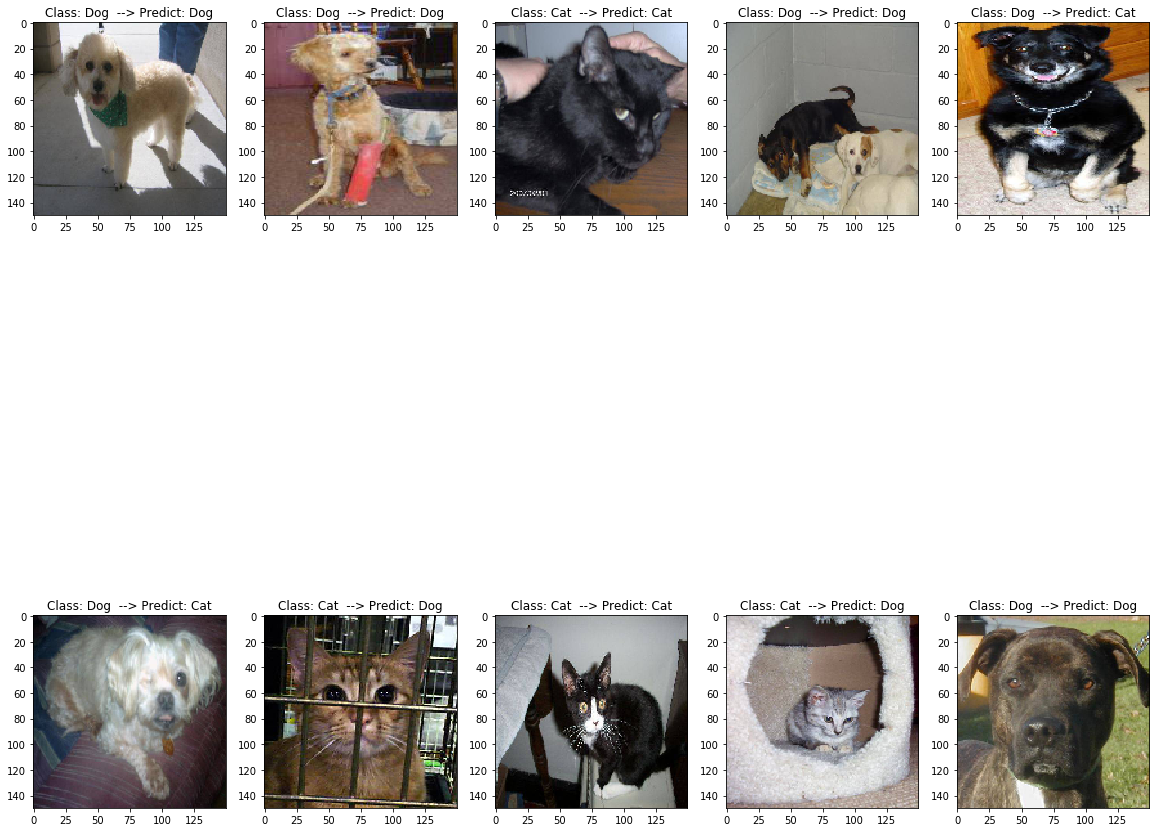

In [79]:
# Visualize image validation using plotImages function that we defined and predict
plotImages(image_test[:10], label_test[:10], 1, mdl=model_dropout)

## 3. New Model, Dropout & Data Augmentation

In [0]:
# Create New Model using Dropout of 20% inputs
model_newdropout = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [90]:
model_newdropout.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_newdropout.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 18, 18, 64)       

In [91]:
history_newdropout = model_newdropout.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/20
15/15 [==============================] - 17s 1s/step - loss: 1.0457 - acc: 0.5043 - val_loss: 0.6922 - val_acc: 0.5045
Epoch 2/20
15/15 [==============================] - 17s 1s/step - loss: 0.6927 - acc: 0.5000 - val_loss: 0.6875 - val_acc: 0.5045
Epoch 3/20
15/15 [==============================] - 16s 1s/step - loss: 0.6849 - acc: 0.5096 - val_loss: 0.6628 - val_acc: 0.5670
Epoch 4/20
15/15 [==============================] - 16s 1s/step - loss: 0.6673 - acc: 0.5529 - val_loss: 0.6495 - val_acc: 0.5770
Epoch 5/20
15/15 [==============================] - 16s 1s/step - loss: 0.6619 - acc: 0.5698 - val_loss: 0.6298 - val_acc: 0.6049
Epoch 6/20
15/15 [==============================] - 15s 1s/step - loss: 0.6496 - acc: 0.5713 - val_loss: 0.6488 - val_acc: 0.6730
Epoch 7/20
15/15 [==============================] - 16s 1s/step - loss: 0.6405 - acc: 0.6062 - val_loss: 0.6360 - val_acc: 0.6250
Epoch 8/20
15/15 [==============================] - 15s 1s/step - loss: 0.6231 - acc: 0.62

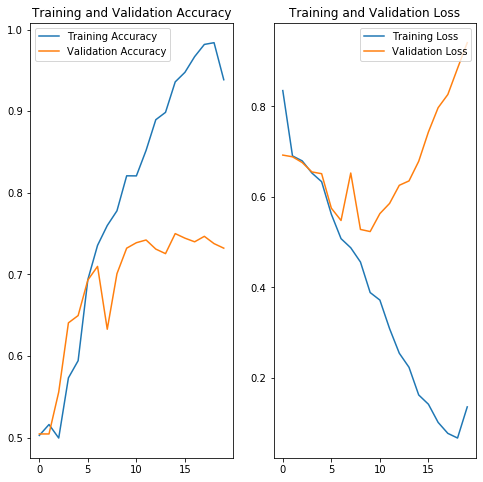

8/8 [==============================] - 3s 365ms/step - loss: 0.5647 - acc: 0.6980


[0.5647382810711861, 0.698]

In [94]:
# Using function 'acc_loss_Plot' to visualize Training and Validation Accuracy & Loss
acc_loss_Plot(history_newdropout)

# Evaluate the model
model_newdropout.evaluate(val_data_gen)

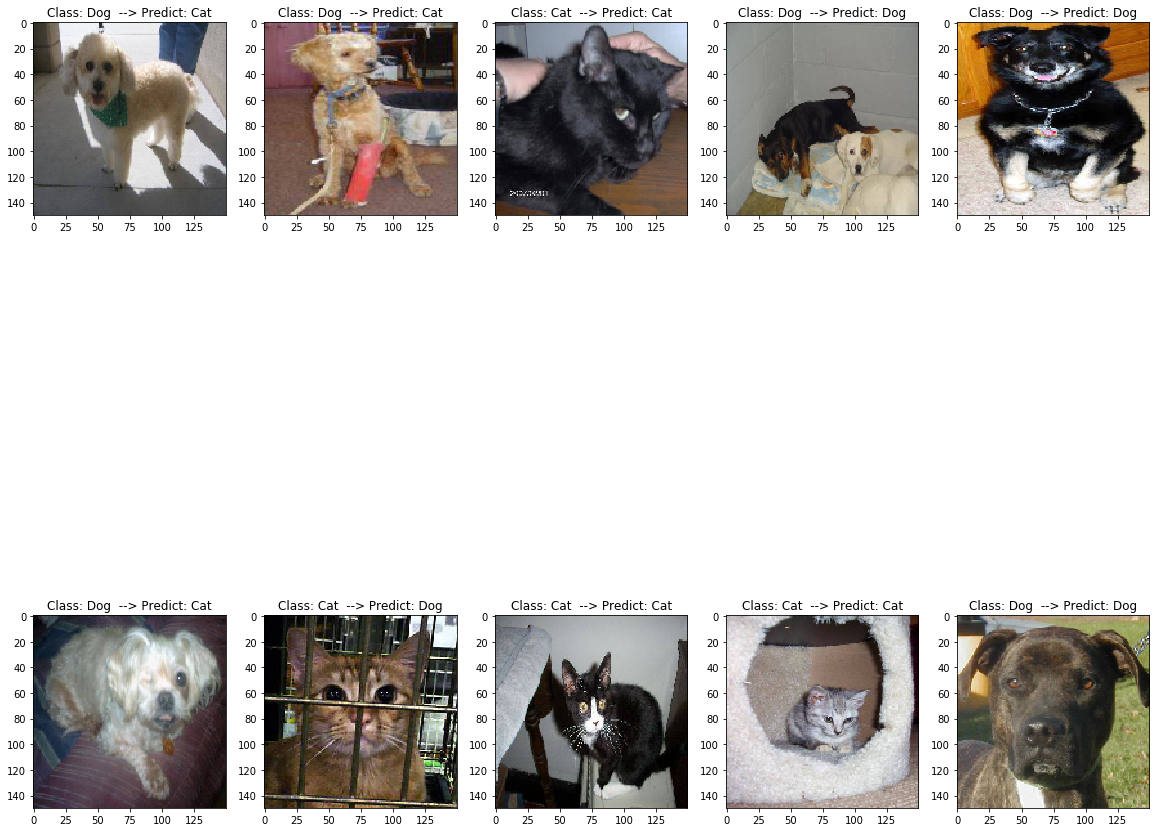

In [95]:
# Visualize image validation using plotImages function that we defined and predict
plotImages(image_test[:10], label_test[:10], 1, mdl=model_newdropout)

# Summary
 
1. The model using only rescale and using ***3 convolution blocks with a max pool layer*** in each of them and connectedfully connected **layer with 512 units** on top of it that is activated by a **relu activation function** achieved an accuracy of about **72%** on the test dataset and overfit at **epochs 6**
2. Because The First model Overfit so the next step is **Dropout of 20% inputs** achieved an accuracy of about **72%** on the test dataset and overfit at **epochs 6**
3. The third experiment is second model with ***Data Augmentation*** achieved an accuracy of about **73%** on the test dataset and overfit at **epochs 6-7**
4. Last, I tried to create new model using ***3 convolution blocks with a max pool layer*** in each of them but the **first layer is same with second layer** and connectedfully connected **layer with 512 units** on top of it that is activated by a **relu activation function** also using **Data Augmentation & Dropout** achieved an accuracy of about **69%** on the test dataset and overfit at **epochs 6-7**

So the conclusion is The third model using 3 normal convolution, Dropout, and Data Augmentation is better model.
